<a href="https://colab.research.google.com/github/JuliPolu/Deep_Learning_TensorFlow_Course/blob/main/Assignment_2_Keras_PJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Урок 2. Keras

Домашнее задание на сайте звучит так:

<ol>
    <li>Попробуйте обучить, нейронную сеть на Keras (рассмотренную на уроке) на датасете MNIST с другими параметрами.
        Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?</li>
    <li>Поработайте с документацией Keras. Попробуйте найти полезные команды Keras неразобранные на уроке.</li>
</ol>

Однако в видео было предложено сделать немного другое задание (описание ниже).

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети),
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

Так как задания перекликаются, но задание в видеоуроке более расширеннное, мной было принято решение выполнять задание из видеоурока

In [ ]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist  # набор для работы

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
(train_imagesi, train_labels), (test_imagesi, test_labels) = fashion_mnist.load_data()

# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [ ]:
import matplotlib.pyplot as plt

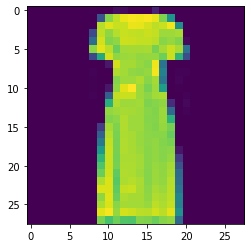

3


In [ ]:
plt.imshow(train_imagesi[50,:,:])
plt.show()
print(train_labels[50])

# Задание 1.

### Зависимость от числа нейронов в слое (для 2-хслойной сети)

Epoch 1/15
165/165 [==============================] - 2s 7ms/step - loss: 1.4879 - accuracy: 0.6885 - val_loss: 1.2146 - val_accuracy: 0.7833
Epoch 2/15
165/165 [==============================] - 1s 6ms/step - loss: 1.0523 - accuracy: 0.8139 - val_loss: 0.9234 - val_accuracy: 0.8249
Epoch 3/15
165/165 [==============================] - 1s 7ms/step - loss: 0.8233 - accuracy: 0.8407 - val_loss: 0.7536 - val_accuracy: 0.8398
Epoch 4/15
165/165 [==============================] - 1s 8ms/step - loss: 0.6786 - accuracy: 0.8573 - val_loss: 0.6451 - val_accuracy: 0.8529
Epoch 5/15
165/165 [==============================] - 1s 5ms/step - loss: 0.5862 - accuracy: 0.8632 - val_loss: 0.5694 - val_accuracy: 0.8577
Epoch 6/15
165/165 [==============================] - 1s 6ms/step - loss: 0.5259 - accuracy: 0.8702 - val_loss: 0.5231 - val_accuracy: 0.8616
Epoch 7/15
165/165 [==============================] - 1s 5ms/step - loss: 0.4756 - accuracy: 0.8759 - val_loss: 0.4780 - val_accuracy: 0.8697
Epoch 

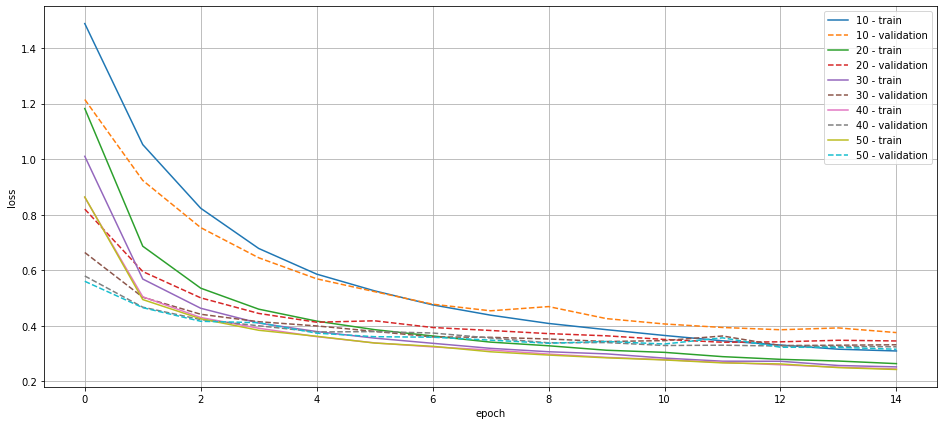

In [ ]:
plt.figure(figsize=(16,7))

epochs = 15

result = []
for neuron_num in [10, 20, 30, 40, 50]:

  # Build the model.
  model = Sequential([ Dense(128, activation='relu', input_shape=(784,)),
                       Dense(neuron_num, activation='sigmoid'),
                       Dense(10, activation='softmax')]
                     )

  # Compile the model.
  model.compile(
      optimizer='adam',
      loss=keras.losses.CategoricalCrossentropy(),
      metrics=['accuracy'],
  )

  # Train the model.
  history = model.fit(
      train_images,
      to_categorical(train_labels, 10),
      epochs=epochs,
      batch_size=256,
      validation_split=0.3
  )

  # результаты
  model_name = f'Model of {neuron_num} neurons'
  model_accuracy = history.history['accuracy'][epochs-1]
  model_val_accuracy = history.history['val_accuracy'][epochs-1]
  result.append([model_name, model_accuracy, model_val_accuracy])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{neuron_num} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{neuron_num} - validation')

plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_accuracy', 'model_val_accuracy']).sort_values('model_val_accuracy', ascending=False)
result_table.head(5)

,model_name,model_accuracy,model_val_accuracy
4,Model of 50 neurons,0.913452,0.888444
2,Model of 30 neurons,0.910238,0.882167
3,Model of 40 neurons,0.912452,0.881000
1,Model of 20 neurons,0.907405,0.878500
0,Model of 10 neurons,0.903738,0.877778


В двуслойной модели увеличение количества нейронов в скрытом слое повышает точность обучения на тренировочной выборке. Однако наилучшая точность на валидационной выборке - при 30 нейронах в скрытом слое, что, по всей видимости, говорит о переобучении, при большем количестве нейроов

### Зависимость от числа слоев

In [ ]:
neuron_num = 30
result = []

In [ ]:
# 2-слойноая модель

# Build the model.
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

# Train the model.
history = model.fit(
    train_images,
    to_categorical(train_labels, 10),
    epochs=epochs,
    batch_size=256,
    validation_split=0.3
)

# Evaluate the model.
test_scores = model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
model_name = '2-слойная сеть'
model_accuracy = history.history['accuracy'][epochs-1]
model_val_accuracy = history.history['val_accuracy'][epochs-1]
test_accuracy = test_scores[1]

result.append([model_name, model_accuracy, model_val_accuracy, test_accuracy])

Epoch 1/15
165/165 [==============================] - 2s 6ms/step - loss: 1.0468 - accuracy: 0.7197 - val_loss: 0.6921 - val_accuracy: 0.8102
Epoch 2/15
165/165 [==============================] - 1s 6ms/step - loss: 0.5800 - accuracy: 0.8321 - val_loss: 0.5156 - val_accuracy: 0.8406
Epoch 3/15
165/165 [==============================] - 1s 6ms/step - loss: 0.4657 - accuracy: 0.8508 - val_loss: 0.4530 - val_accuracy: 0.8513
Epoch 4/15
165/165 [==============================] - 1s 5ms/step - loss: 0.4136 - accuracy: 0.8635 - val_loss: 0.4103 - val_accuracy: 0.8617
Epoch 5/15
165/165 [==============================] - 1s 8ms/step - loss: 0.3831 - accuracy: 0.8694 - val_loss: 0.3957 - val_accuracy: 0.8645
Epoch 6/15
165/165 [==============================] - 1s 7ms/step - loss: 0.3561 - accuracy: 0.8787 - val_loss: 0.3780 - val_accuracy: 0.8692
Epoch 7/15
165/165 [==============================] - 1s 6ms/step - loss: 0.3382 - accuracy: 0.8824 - val_loss: 0.3699 - val_accuracy: 0.8699
Epoch 

In [ ]:
# 3-слойноая модель

# Build the model.
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

# Train the model.
history = model.fit(
    train_images,
    to_categorical(train_labels, 10),
    epochs=epochs,
    batch_size=256,
    validation_split=0.3
)

# Evaluate the model.
test_scores = model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
model_name = '3-слойная сеть'
model_accuracy = history.history['accuracy'][epochs-1]
model_val_accuracy = history.history['val_accuracy'][epochs-1]
test_accuracy = test_scores[1]

result.append([model_name, model_accuracy, model_val_accuracy, test_accuracy])

Epoch 1/15
165/165 [==============================] - 2s 8ms/step - loss: 1.6263 - accuracy: 0.6738 - val_loss: 1.1642 - val_accuracy: 0.7814
Epoch 2/15
165/165 [==============================] - 1s 5ms/step - loss: 0.8916 - accuracy: 0.8041 - val_loss: 0.7043 - val_accuracy: 0.8218
Epoch 3/15
165/165 [==============================] - 1s 6ms/step - loss: 0.6027 - accuracy: 0.8387 - val_loss: 0.5445 - val_accuracy: 0.8386
Epoch 4/15
165/165 [==============================] - 1s 6ms/step - loss: 0.4879 - accuracy: 0.8548 - val_loss: 0.4745 - val_accuracy: 0.8501
Epoch 5/15
165/165 [==============================] - 1s 7ms/step - loss: 0.4308 - accuracy: 0.8633 - val_loss: 0.4419 - val_accuracy: 0.8592
Epoch 6/15
165/165 [==============================] - 1s 7ms/step - loss: 0.3881 - accuracy: 0.8736 - val_loss: 0.4071 - val_accuracy: 0.8636
Epoch 7/15
165/165 [==============================] - 1s 6ms/step - loss: 0.3631 - accuracy: 0.8796 - val_loss: 0.3984 - val_accuracy: 0.8637
Epoch 

In [ ]:
# 5-слойноая модель

# Build the model.
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

# Train the model.
history = model.fit(
    train_images,
    to_categorical(train_labels, 10),
    epochs=epochs,
    batch_size=256,
    validation_split=0.3
)

# Evaluate the model.
test_scores = model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
model_name = '5-слойная сеть'
model_accuracy = history.history['accuracy'][epochs-1]
model_val_accuracy = history.history['val_accuracy'][epochs-1]
test_accuracy = test_scores[1]

result.append([model_name, model_accuracy, model_val_accuracy, test_accuracy])

Epoch 1/15
165/165 [==============================] - 2s 7ms/step - loss: 2.1260 - accuracy: 0.2370 - val_loss: 1.7957 - val_accuracy: 0.3748
Epoch 2/15
165/165 [==============================] - 1s 6ms/step - loss: 1.5587 - accuracy: 0.3921 - val_loss: 1.3306 - val_accuracy: 0.3980
Epoch 3/15
165/165 [==============================] - 1s 6ms/step - loss: 1.2076 - accuracy: 0.4620 - val_loss: 1.1446 - val_accuracy: 0.4833
Epoch 4/15
165/165 [==============================] - 1s 6ms/step - loss: 1.0632 - accuracy: 0.5729 - val_loss: 0.9970 - val_accuracy: 0.5654
Epoch 5/15
165/165 [==============================] - 1s 6ms/step - loss: 0.9088 - accuracy: 0.6434 - val_loss: 0.8512 - val_accuracy: 0.6564
Epoch 6/15
165/165 [==============================] - 1s 8ms/step - loss: 0.7893 - accuracy: 0.6997 - val_loss: 0.7652 - val_accuracy: 0.7259
Epoch 7/15
165/165 [==============================] - 1s 9ms/step - loss: 0.7109 - accuracy: 0.7392 - val_loss: 0.6938 - val_accuracy: 0.7464
Epoch 

In [ ]:
# 10-слойноая модель

# Build the model.
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

# Train the model.
history = model.fit(
    train_images,
    to_categorical(train_labels, 10),
    epochs=epochs,
    batch_size=256,
    validation_split=0.3
)

# Evaluate the model.
test_scores = model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
model_name = '10-слойная сеть'
model_accuracy = history.history['accuracy'][epochs-1]
model_val_accuracy = history.history['val_accuracy'][epochs-1]
test_accuracy = test_scores[1]

result.append([model_name, model_accuracy, model_val_accuracy, test_accuracy])

Epoch 1/15
165/165 [==============================] - 3s 10ms/step - loss: 2.1164 - accuracy: 0.3112 - val_loss: 1.7080 - val_accuracy: 0.3822
Epoch 2/15
165/165 [==============================] - 1s 6ms/step - loss: 1.3674 - accuracy: 0.4665 - val_loss: 1.1700 - val_accuracy: 0.5671
Epoch 3/15
165/165 [==============================] - 1s 6ms/step - loss: 1.0554 - accuracy: 0.6298 - val_loss: 0.9932 - val_accuracy: 0.6804
Epoch 4/15
165/165 [==============================] - 1s 6ms/step - loss: 0.9035 - accuracy: 0.7029 - val_loss: 0.8495 - val_accuracy: 0.7204
Epoch 5/15
165/165 [==============================] - 1s 6ms/step - loss: 0.7784 - accuracy: 0.7383 - val_loss: 0.7887 - val_accuracy: 0.7432
Epoch 6/15
165/165 [==============================] - 1s 6ms/step - loss: 0.6906 - accuracy: 0.7695 - val_loss: 0.6768 - val_accuracy: 0.7873
Epoch 7/15
165/165 [==============================] - 1s 7ms/step - loss: 0.6233 - accuracy: 0.7912 - val_loss: 0.6433 - val_accuracy: 0.7712
Epoch

In [ ]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_accuracy', 'model_val_accuracy', 'test_accuracy']).sort_values('model_val_accuracy', ascending=False)
result_table.head(5)

,model_name,model_accuracy,model_val_accuracy,test_accuracy
1,3-слойная сеть,0.912071,0.884889,0.8745
0,2-слойная сеть,0.908690,0.883333,0.8745
2,5-слойная сеть,0.872548,0.857389,0.8496
3,10-слойная сеть,0.876810,0.849778,0.8404


Самая высокая точность у 3х слойной модели

#Задание 2

Epoch 1/15
165/165 [==============================] - 2s 8ms/step - loss: 1.6417 - accuracy: 0.6823 - val_loss: 1.1968 - val_accuracy: 0.7812
Epoch 2/15
165/165 [==============================] - 2s 13ms/step - loss: 0.9300 - accuracy: 0.8048 - val_loss: 0.7306 - val_accuracy: 0.8273
Epoch 3/15
165/165 [==============================] - 1s 9ms/step - loss: 0.6137 - accuracy: 0.8416 - val_loss: 0.5586 - val_accuracy: 0.8380
Epoch 4/15
165/165 [==============================] - 1s 6ms/step - loss: 0.4857 - accuracy: 0.8570 - val_loss: 0.4923 - val_accuracy: 0.8434
Epoch 5/15
165/165 [==============================] - 1s 5ms/step - loss: 0.4212 - accuracy: 0.8682 - val_loss: 0.4242 - val_accuracy: 0.8655
Epoch 6/15
165/165 [==============================] - 1s 6ms/step - loss: 0.3862 - accuracy: 0.8750 - val_loss: 0.4067 - val_accuracy: 0.8663
Epoch 7/15
165/165 [==============================] - 1s 5ms/step - loss: 0.3580 - accuracy: 0.8807 - val_loss: 0.3887 - val_accuracy: 0.8687
Epoch

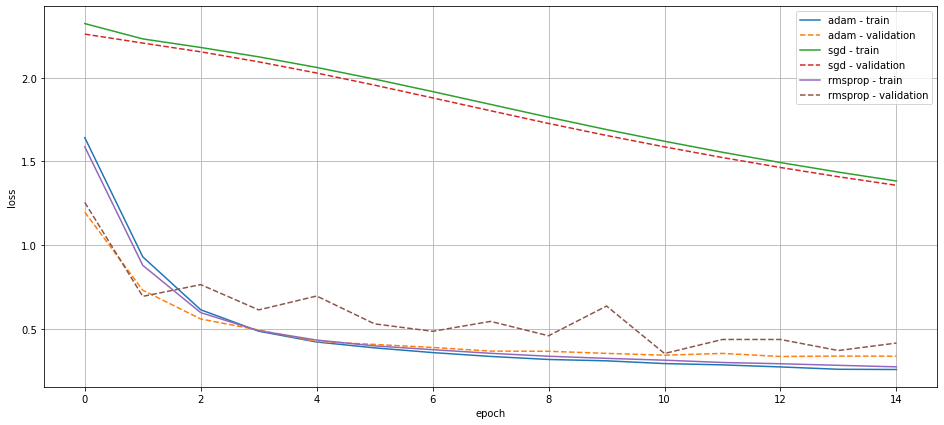

In [ ]:
plt.figure(figsize=(16,7))

epochs = 15
neuron_num = 30

optimizers = ['adam', 'sgd', 'rmsprop']

result = []
for opt in optimizers:

  # Build the model.
  model = Sequential([ Dense(128, activation='relu', input_shape=(784,)),
                       Dense(neuron_num, activation='sigmoid'),
                       Dense(neuron_num, activation='sigmoid'),
                       Dense(10, activation='softmax')]
                     )

  # Compile the model.
  model.compile(
      optimizer=opt,
      loss=keras.losses.CategoricalCrossentropy(),
      metrics=['accuracy'],
  )

  # Train the model.
  history = model.fit(
      train_images,
      to_categorical(train_labels, 10),
      epochs=epochs,
      batch_size=256,
      validation_split=0.3
  )

  # результаты
  model_name = f'Model with {opt} optimizers'
  model_accuracy = history.history['accuracy'][epochs-1]
  model_val_accuracy = history.history['val_accuracy'][epochs-1]
  result.append([model_name, model_accuracy, model_val_accuracy])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{opt} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{opt} - validation')

plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_accuracy', 'model_val_accuracy']).sort_values('model_val_accuracy', ascending=False)
result_table.head(5)

,model_name,model_accuracy,model_val_accuracy
0,Model with adam optimizers,0.910310,0.884389
2,Model with rmsprop optimizers,0.901071,0.853778
1,Model with sgd optimizers,0.648786,0.653833


Лучший результат показал оптимизатор 'Adam'. Близко к нему, по результатам оказался оптимизатор 'RMSProp', однако из графика видно, что, в отличии от 'Adam', его фунция потерь не является монотонно убывающе на валидационной выборке

Таким образом, на качетво модели может все три параметра - число нейронов с скрытом слое, число слоев и оптимизатор. Однако не всегда простое увеличение числа нейронов и слоев ведет к повышению точности.
 Для данной задаци, наилучшие результаты оказались числе нейронов 30, 3х слоях и оптимизаторе 'Adam'

#Задание 4

In [ ]:
# 3-слойноая модель

# Build the model.
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(neuron_num, activation='sigmoid'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

model.fit(
    train_images,
    to_categorical(train_labels, 10),
    epochs=epochs,
    batch_size=256,
    validation_split=0.3
)

Epoch 1/15
165/165 [==============================] - 2s 7ms/step - loss: 1.6553 - accuracy: 0.6673 - val_loss: 1.1670 - val_accuracy: 0.7915
Epoch 2/15
165/165 [==============================] - 1s 7ms/step - loss: 0.8919 - accuracy: 0.8116 - val_loss: 0.7053 - val_accuracy: 0.8238
Epoch 3/15
165/165 [==============================] - 1s 8ms/step - loss: 0.6034 - accuracy: 0.8411 - val_loss: 0.5461 - val_accuracy: 0.8439
Epoch 4/15
165/165 [==============================] - 1s 6ms/step - loss: 0.4883 - accuracy: 0.8555 - val_loss: 0.4686 - val_accuracy: 0.8552
Epoch 5/15
165/165 [==============================] - 1s 7ms/step - loss: 0.4290 - accuracy: 0.8650 - val_loss: 0.4496 - val_accuracy: 0.8527
Epoch 6/15
165/165 [==============================] - 1s 7ms/step - loss: 0.3946 - accuracy: 0.8715 - val_loss: 0.4180 - val_accuracy: 0.8599
Epoch 7/15
165/165 [==============================] - 1s 6ms/step - loss: 0.3703 - accuracy: 0.8757 - val_loss: 0.3890 - val_accuracy: 0.8688
Epoch 

In [ ]:
test_pred = np.argmax(model.predict(test_images), axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.80      0.79      1000
           3       0.84      0.91      0.88      1000
           4       0.80      0.77      0.79      1000
           5       0.92      0.97      0.95      1000
           6       0.68      0.70      0.69      1000
           7       0.93      0.94      0.94      1000
           8       0.96      0.96      0.96      1000
           9       0.98      0.93      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(16,7))
    plt.imshow(cm, interpolation='nearest',  cmap=cmap)

    plt.grid(False)
    plt.title('confusion matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()

Confusion matrix, without normalization
[[797   1  13  37   1   3 138   1   9   0]
 [  1 964   1  25   4   0   3   0   2   0]
 [ 12   0 796  22  83   1  83   0   3   0]
 [ 14   6  10 913  28   2  23   0   4   0]
 [  0   1 110  50 772   0  64   0   3   0]
 [  0   0   0   0   0 973   0  19   1   7]
 [ 96   2  80  33  73   0 700   0  16   0]
 [  0   0   0   0   0  44   0 940   1  15]
 [  0   1   1   3   3  10  13   5 964   0]
 [  0   0   0   0   0  26   0  45   1 928]]


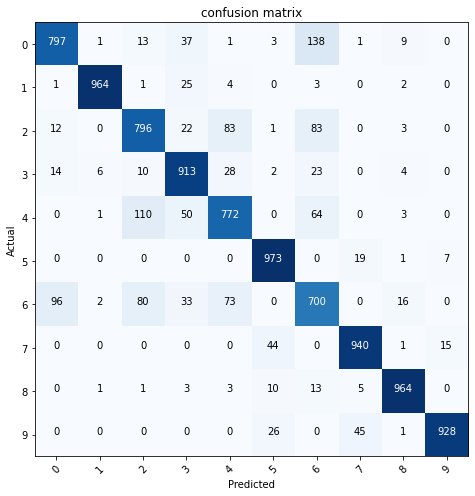

In [ ]:
cm = confusion_matrix(test_labels, test_pred)
plot_confusion_matrix(cm, classes=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

* Также хочется отметить, что в Keras есть команда `early_stopping`, которая позволяет прерывать обучение, если потери при проверке больше не уменьшаются уже какое-то количество эпох (параметр `patience`). Использование данной команды позволит сократить трату ресурсов на вычисление ненужных эпох.